## Import the data

In [1]:
!ls
import pandas as pd
import warnings
from datetime import datetime
import numpy as np
import pickle
from pandas.core.frame import DataFrame
warnings.filterwarnings('ignore')

Austin Bike.ipynb	      pcard.p		      risk fact.csv
Internal Aduit (Pcard).ipynb  PwC Case Dataset.xlsx   risk_fact.csv
Pcard2.22.ipynb		      PwC-Python.csv	      Trips.csv
pcard-2.ipynb		      PwC-Python-Premium.csv  Untitled1.ipynb
pcard 3-5.ipynb		      readonly		      Untitled.ipynb
PCard+Anti-Bug.ipynb	      regression.csv
PCard Anti-Bug.p	      regression.ipynb


In [2]:
Trip=pd.read_csv('Trips.csv',encoding='utf-8')

#### Drop NA

In [3]:
Trip.dropna()
Trip.sample(5)

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
235856,446.0,16:13:15,9,2501.0,5th & Bowie,11.0,2539.0,Convention Center / 3rd & Trinity,2016-11-27 16:13:15,Walk Up,12990942,2016.0
371827,224.0,17:07:35,170,3390.0,Brazos & 6th,10.0,3390.0,Brazos & 6th,2016-10-02 17:07:35,Walk Up,12200193,2016.0
155746,429.0,13:12:00,14,2503.0,South Congress & James,10.0,2498.0,Convention Center / 4th St. @ MetroRail,2014-10-12 13:12:00,24-Hour Kiosk (Austin B-cycle),9900276686,2014.0
329380,759.0,9:12:00,9,NaN,Convention Center/ 3rd & Trinity,7.0,2504.0,South Congress & Elizabeth,2014-07-22 09:12:00,7-Day Membership (Austin B-cycle),9900193162,2014.0
580944,693.0,17:29:42,11,2537.0,West & 6th St.,5.0,2546.0,ACC - West & 12th Street,2016-05-28 17:29:42,Walk Up,10208225,2016.0


#### Grasp the names of all the stations

In [4]:
Station = Trip['start_station_name'].unique().tolist()

### Question 1. The most popular stations

In [16]:
station = Trip.groupby('start_station_name').count()
station.sort(['start_station_id'],ascending=False)['start_station_id'].tail(30)

start_station_name
Boardwalk West                                          773
Pease Park                                              675
8th & Guadalupe                                         587
East 7th & Pleasant Valley                              550
13th & San Antonio                                      527
Republic Square                                         453
State Parking Garage @ Brazos & 18th                    250
Sterzing at Barton Springs                              198
Congress & Cesar Chavez                                 182
Henderson & 9th                                          96
Main Office                                               7
Stolen                                                    1
MapJam at Hops & Grain Brewery                            0
Shop                                                      0
MapJam at Scoot Inn                                       0
ACC - West & 12th                                         0
Convention Center/ 3r

We define the stations with the most trips as the most popular stations. The result indicats that 'Riverside @ S. Lamar', 'City Hall / Lavaca & 2nd' and 'City Hall / Lavaca & 2nd ' are the most popular stations.

### Question 2. What are the most popular month?

#### Allocate the trips to the years they occurs

In [6]:
Trip_2013 = Trip[Trip.year == 2013.0]
Trip_2014 = Trip[Trip.year == 2014.0]
Trip_2015 = Trip[Trip.year == 2015.0]
Trip_2016 = Trip[Trip.year == 2016.0]
Trip_2017 = Trip[Trip.year == 2017.0]

In [7]:
month_2013 = Trip_2013.groupby('month').count()
month_2013.sort(['trip_id'],ascending=False)['trip_id']
month_3 = month_2013['trip_id']
list1 = [0,0,0,0,0,0,0,0,0,0,0]
month_3 = month_3.tolist()
MT_2013 = list1 + month_3

For 2013, we only have the data of December

In [8]:
month_2014 = Trip_2014.groupby('month').count()
M2014 = month_2014.sort(['trip_id'],ascending=False)['trip_id']
month_4 = month_2014['trip_id']
MT_2014 = month_4.tolist()
M2014 

month
3.0     25792
10.0    22795
5.0     15047
4.0     14461
7.0     14346
6.0     13650
9.0     11563
8.0     11128
11.0    10767
12.0     7273
2.0      5506
1.0      3375
Name: trip_id, dtype: int64

For 2014, March and October had the most trips while Jan and Feb had the least.

In [9]:
month_2015 = Trip_2015.groupby('month').count()
M2015 = month_2015.sort(['trip_id'],ascending=False)['trip_id']
month_5 = month_2015['trip_id']
MT_2015 = month_5.tolist()
M2015

month
3.0     30112
10.0    22864
4.0     16554
7.0     16332
5.0     15842
9.0     15244
8.0     14523
6.0     13894
11.0    11762
12.0    10057
2.0      9572
1.0      7765
Name: trip_id, dtype: int64

Same as the situations in 2014, March and October had the most trips while Jan and Feb had the least.

In [10]:
month_2016 = Trip_2016.groupby('month').count()
M2016 = month_2016.sort(['trip_id'],ascending=False)['trip_id']
month_6 = month_2016['trip_id']
MT_2016 = month_6.tolist()
MT_2016.insert(3,0)
MT_2016.insert(11,0)
M2016

month
3.0     29566
10.0    24266
1.0     22161
5.0     19560
6.0     16540
7.0     16255
9.0     15939
11.0    14653
2.0     13355
8.0     12385
Name: trip_id, dtype: int64

Similar to the previous two years except that for 2016, August had the number of least trips.

In [11]:
month_2017 = Trip_2017.groupby('month').count()
M2017 = month_2017.sort(['trip_id'],ascending=False)['trip_id']
month_7 = month_2017['trip_id']
MT_2017 = month_7.tolist()
list1 = [0,0,0,0,0,0,0]
MT_2017 = MT_2017 + list1
M2017 

month
3.0    26532
4.0    22404
5.0    19123
2.0    13599
1.0    10460
Name: trip_id, dtype: int64

To make it straightfoward, we did a visulization. The picture indictas that for all 4 years, March and October were the most popular. Moreover, there is an increasing trend for the number of trips year by year.

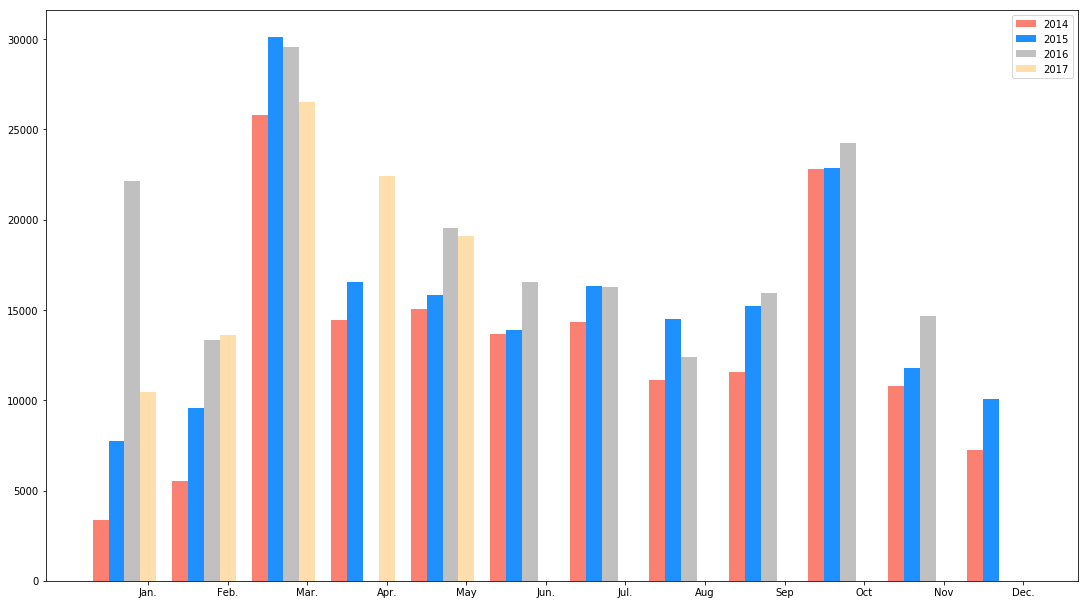

In [12]:
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

x = np.arange(12)
total_width, n = 0.8, 4
width = total_width / n
x = x + 10 


name_list = ['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug', 'Sep', 'Oct', 'Nov', 'Dec.'] 


#plt.bar(x , MT_2013, width=width, label='2013',fc = 'maroon', tick_label=name_list)
plt.bar(x , MT_2014, width=width, label='2014',fc = 'salmon', tick_label=name_list)
plt.bar(x + width, MT_2015, width=width, label='2015', fc = 'dodgerblue', tick_label=name_list)
plt.bar(x + 2 * width, MT_2016, width=width, label='2016', fc = 'silver', tick_label=name_list)
plt.bar(x + 3 * width , MT_2017, width=width, label='2017',fc = 'navajowhite', tick_label=name_list)




#plt.bar(index + bar_width, range(len(MT_2013)), MT_2013, fc='g', tick_label=name_list)
#plt.bar(x, range(len(MT_2014)), MT_2014, width = width, fc='y', tick_label=name_list)


plt.legend()
plt.show()
